# Importar librerías

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

# Cargar los datos

Como el dataset es muy grande solo vamos a usar las primera 80000 filas.

In [3]:
df  = pd.read_csv("./data/creditcard.csv")[:80_000]
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [9]:
df.Class.unique()

array([0, 1])

In [4]:
X = df.drop(columns=['Time', 'Amount', 'Class']).values
y = df['Class'].values
f"Shapes of X={X.shape} y={y.shape}, #Fraud Cases={y.sum()}"

'Shapes of X=(80000, 28) y=(80000,), #Fraud Cases=196'

# LogisticRegression

In [6]:
from sklearn.linear_model import LogisticRegression

mod = LogisticRegression(max_iter=1000)
mod.fit(X, y).predict(X).sum()

151

In [7]:
mod = LogisticRegression(class_weight={0: 1, 1: 2}, max_iter=1000)
mod.fit(X, y).predict(X).sum()

171

# GridSearchCV

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, make_scorer

In [11]:
grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={'class_weight': [{0: 1, 1: v} for v in range(1,4)]},
    cv=4,
    n_jobs=-1
)
grid.fit(X, y);

In [14]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,1.126224,0.243861,0.003684,0.000045,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.99405,0.99835,0.99945,0.99780,0.997413,0.002030,1
1,1.042547,0.254501,0.003382,0.000551,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.99025,0.99840,0.99960,0.99805,0.996575,0.003697,2
2,0.925649,0.056516,0.003157,0.001251,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.98730,0.99845,0.99960,0.99815,0.995875,0.004980,3


In [13]:
grid.best_params_

{'class_weight': {0: 1, 1: 1}}

In [15]:
from sklearn.metrics import precision_score, recall_score, make_scorer

In [17]:
precision_score(y, grid.predict(X))

0.7682119205298014

In [19]:
recall_score(y, grid.predict(X))

0.5918367346938775

Añadimos los score al gridsearch

In [31]:
grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={'class_weight': [{0: 1, 1: v} for v in range(1,4)]},
    scoring={'precision': make_scorer(precision_score), 
             'recall': make_scorer(recall_score)},
    refit='precision',
    return_train_score=True,
    cv=4,
    n_jobs=-1
)
grid.fit(X, y);

In [24]:
grid.best_params_

{'class_weight': {0: 1, 1: 1}}

In [25]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,split3_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_train_recall,split1_train_recall,split2_train_recall,split3_train_recall,mean_train_recall,std_train_recall
0,1.091947,0.212254,0.018552,0.001248,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.281250,1.0,0.952381,0.857143,...,0.122449,0.545918,0.331397,3,0.863946,0.585034,0.530612,0.693878,0.668367,0.127301
1,1.007719,0.259941,0.016737,0.000604,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.190678,1.0,0.955556,0.812500,...,0.265306,0.602041,0.297672,2,0.870748,0.659864,0.632653,0.782313,0.736395,0.095889
2,0.828849,0.098288,0.013655,0.003954,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.154882,1.0,0.955556,0.800000,...,0.326531,0.627551,0.281816,1,0.870748,0.714286,0.680272,0.816327,0.770408,0.076568


Aumentamos el `cv = 10`

In [39]:
grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={'class_weight': [{0: 1, 1: v} for v in np.linspace(1, 20, 30)]},
    scoring={'precision': make_scorer(precision_score), 
             'recall': make_scorer(recall_score)},
    refit='precision',
    return_train_score=True,
    cv = 10,
    n_jobs=-1
)
grid.fit(X, y)


GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1.0},
                                          {0: 1, 1: 1.6551724137931034},
                                          {0: 1, 1: 2.310344827586207},
                                          {0: 1, 1: 2.9655172413793105},
                                          {0: 1, 1: 3.6206896551724137},
                                          {0: 1, 1: 4.275862068965517},
                                          {0: 1, 1: 4.931034482758621},
                                          {0: 1, 1: 5.586206896551724},
                                          {0: 1, 1: 6.241379310344827},
                                          {0: 1, 1: 6.896551724137931},...
                                          {0: 1, 1: 14.758620689655173},
                                          {0: 1, 1: 15.413793103448276},
                                          {0: 1, 1: 16.06896551724

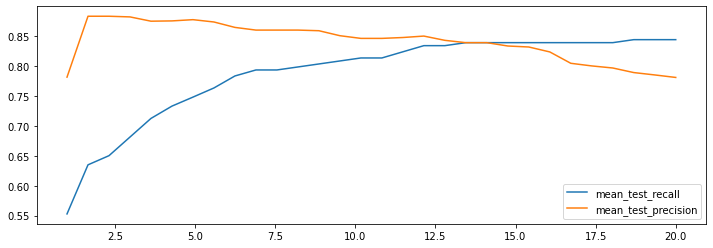

In [43]:
plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall', 'mean_test_precision']:
    plt.plot([_[1] for _ in df_results['param_class_weight']], 
             df_results[score], 
             label=score)
plt.legend()
plt.savefig("./images/recall_precision.png")

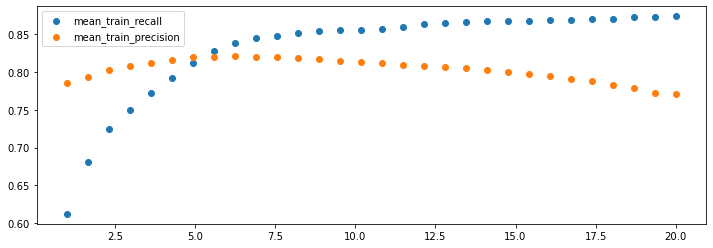

In [42]:

plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_train_recall', 'mean_train_precision']:
    plt.scatter(x=[_[1] for _ in df_results['param_class_weight']], 
                y=df_results[score.replace('test', 'train')], 
                label=score)
plt.legend()
plt.savefig("./images/test_train.png")

# Min(recall_score, precision_score)

In [45]:
def min_recall_precision(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return min(recall, precision)

In [47]:
grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={'class_weight': [{0: 1, 1: v} for v in np.linspace(1, 20, 30)]},
    scoring={'precision': make_scorer(precision_score), 
             'recall': make_scorer(recall_score),
             'min_both':make_scorer(min_recall_precision)},
    refit='min_both',
    return_train_score=True,
    cv=10,
    n_jobs=-1
)
grid.fit(X, y);

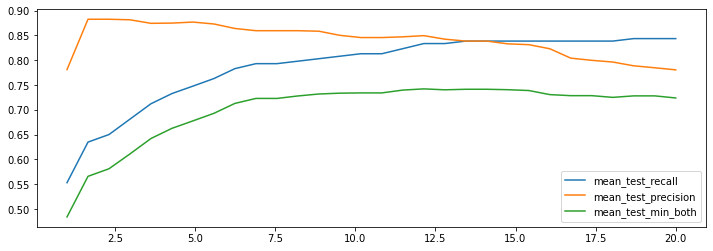

In [49]:

plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall', 'mean_test_precision', 'mean_test_min_both']:
    plt.plot([_[1] for _ in df_results['param_class_weight']], 
             df_results[score], 
             label=score)
plt.legend()
plt.savefig("./images/min.png")

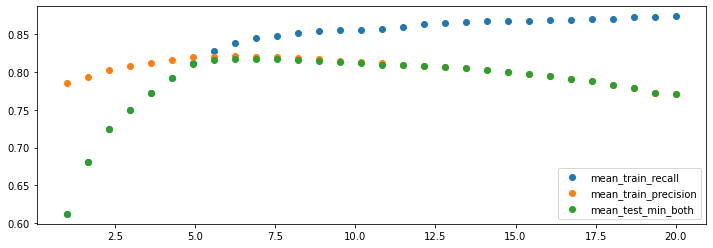

In [50]:

plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_train_recall', 'mean_train_precision', 'mean_test_min_both']:
    plt.scatter(x=[_[1] for _ in df_results['param_class_weight']], 
                y=df_results[score.replace('test', 'train')], 
                label=score)
plt.legend()
plt.savefig("./images/mean_min.png")


# Uso de modelos de detección  Outlier

In [12]:
from collections import Counter
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, make_scorer

In [6]:
mod = IsolationForest().fit(X)

array([0, 0, 0, ..., 0, 0, 0])

In [7]:
Counter(mod.predict(X))

Counter({1: 76910, -1: 3090})

In [8]:
np.where(mod.predict(X) == -1, 1, 0)

array([0, 0, 0, ..., 0, 0, 0])

Tenemos que usar otras funciones, porque las metricas anteriomente usadas solo aceptan los valores `0/1`

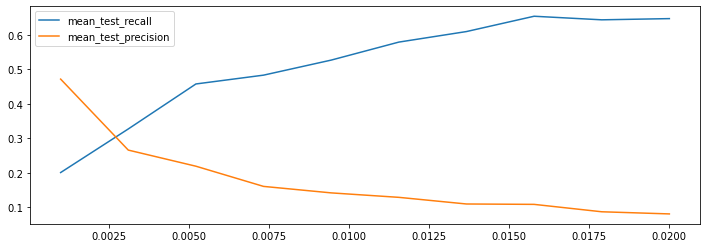

In [13]:
def outlier_precision(mod, X, y):
    preds = mod.predict(X)
    return precision_score(y, np.where(preds == -1, 1, 0))

def outlier_recall(mod, X, y):
    preds = mod.predict(X)
    return recall_score(y, np.where(preds == -1, 1, 0))

grid = GridSearchCV(
    estimator=IsolationForest(),
    param_grid={'contamination': np.linspace(0.001, 0.02, 10)},
    scoring={'precision': outlier_precision, 
             'recall': outlier_recall},
    refit='precision',
    cv=5,
    n_jobs=-1
)
grid.fit(X, y);

plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall', 'mean_test_precision']:
    plt.plot(df_results['param_contamination'], 
             df_results[score], 
             label=score)
plt.legend()
plt.savefig("./images/outlier.png")